# Solucion de Ejercicio - Redistribucion de Fuerzas en Barras

Determinar:

1. Grafica Carga versus Deformacion
2. Relacion entre las fuerzas de las barras y deformacion
3. Relaciones entre carga y desplazamiento ultimos y cargas y desplazaminento de fluencia

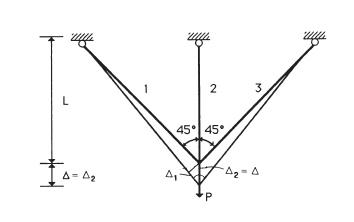



In [30]:
# Importamos depencencias
import numpy as np
import math
import matplotlib.pyplot as plt

## Datos del Problema


In [31]:
# Uninades Consistentes
# MKS [kgf, cm]

P=500 #[kgf]
L=500 #[cm]
alpha=45 #[Grados]

A=5*5 #[cm²]

fy=50*70.3
E=29000*70.3

## Ecuaciones Determinadas
***
### Rango Elastico
&emsp;
<br>
**EQUILIBRIO:**
$$
T_1=T_2 \cos \alpha=\frac{T_2}{2}
$$
<br>

**CINEMATICA:**
$$
\delta_1=\delta_2 \cos \delta_1=\frac{\delta_2}{\sqrt{2}}
$$
 <br>
 
 **RELACIONES CONSTITUTIVAS:**
$$
[0 \leq P \leq P_y]
$$
<br>

$$
\delta(P)=\frac{PL}{(2+\sqrt{2})AE}
$$
<br>

 **VALORES LIMITE:**
$$
P_y=\frac{2+\sqrt{2}}{2} \sigma_y A
$$
<br>
$$
\delta_y=\frac{\sigma_y}{E}
$$
***
### Rango Parcialmente Plastico
&emsp;
**EQUILIBRIO:**
$$
T_1=\frac{P-\sigma_y A}{\sqrt{2}}
$$
<br>
$$
T_2=\sigma_y A
$$
<br>
**CINEMATICA:**
$$
\delta_1=\delta_2 \cos \delta_1=\frac{\delta_2}{\sqrt{2}}
$$
 <br>
 **RELACIONES CONSTITUTIVAS:**
$$
[P < P \leq P_p]
$$
<br>
$$
\delta(P)=\frac{\sqrt{2}PL}{AE}-\frac{\sqrt{2} \sigma_y L}{AE}
$$
<br>
 **VALORES LIMITE:**
$$
P_p=(\sqrt{2}+1) \sigma_y A
$$
<br>
$$
\delta_p=\frac{2 \sigma_y}{E}
$$
***

## Calculo de Varoles Limite

In [32]:
e_y=fy/E
# Calculos en el rango elastico
print('Deformacion unitaria de fluencia '+r'$\epsilon_y$'+' = '+str(round(e_y,4)))
Py=((2+2**0.5)/2)*fy*A
print('La carga de fluencia del sistema es = '+str(round(Py/1000,1))+' [tf]')
delta_y=e_y*L
print('La deformacion de fluencia del sistema es = '+str(round(delta_y*10,2))+' [mm]')
Ty_1=Py/(2+2**0.5)
Ty_2=2*Ty_1

# Calculos en el rango parcialmente plastico
Pp=fy*A*(2**0.5+1)
print('La carga de platificacion es = '+str(round(Pp/1000,2))+' [tf]')
delta_p=2*e_y*L
print('La deformacion de plastificacion del sistema es = '+str(round(delta_p*10,2))+' [mm]')
Tp_2=fy*A
Tp_1=(Pp-Tp_2)/(2**0.5)


Deformacion unitaria de fluencia $\epsilon_y$ = 0.0017
La carga de fluencia del sistema es = 150.0 [tf]
La deformacion de fluencia del sistema es = 8.62 [mm]
La carga de platificacion es = 212.15 [tf]
La deformacion de plastificacion del sistema es = 17.24 [mm]


## Graficos

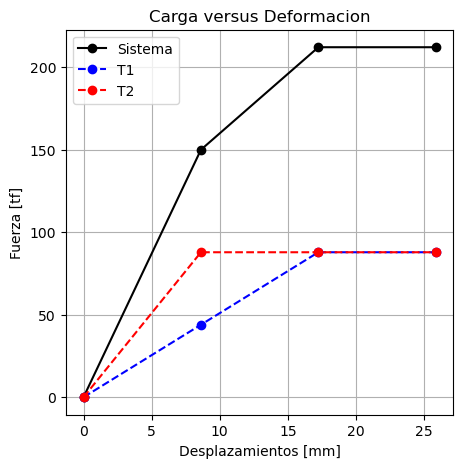

In [42]:
delta=np.array([0,delta_y,delta_p,delta_p*1.5])
P=np.array([0,Py,Pp,Pp])
T1=np.array([0,Ty_1,Tp_1,Tp_1])
T2=np.array([0,Ty_2,Tp_2,Tp_2])

plt.figure(figsize=(5,5),dpi=100)
plt.plot(delta*10,P/1000,marker='o',color='k')
plt.plot(delta*10,T1/1000,marker='o',color='b',linestyle='--')
plt.plot(delta*10,T2/1000,marker='o',color='r',linestyle='--')
plt.grid(True)
plt.xlabel('Desplazamientos [mm]')
plt.ylabel('Fuerza [tf]')
plt.title('Carga versus Deformacion')
plt.legend(['Sistema','T1','T2'])